# Principal Component Analysis - PCA

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### A. Cargar data

In [2]:
# Base de datos de scikit-learn
breast = load_breast_cancer()
breast_data = breast.data

In [3]:
# Etiquetas: 0 - Benigno, 1 - Maligno
breast_labels = breast.target
labels = np.reshape(breast_labels,(569,1))

In [4]:
# Se agregan las etiquetas a la matriz de datos
final_breast_data = np.concatenate([breast_data,labels],axis=1)

In [5]:
# Generar dataframe
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names # nombre de las columnas
features_labels = np.append(features,'target') # se agregan las etiquetas
breast_dataset.columns = features_labels

In [6]:
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


### B. Pre-procesamiento

El calculo de los autovalores y autovectores depende de la matriz de covarianza, por lo que el PCA es un método que depende de la escala de las variables. 

In [7]:
X = breast_dataset.loc[:, features].values
X = StandardScaler().fit_transform(X) # media - 0, std - 1

### C. Caluclo de las componentes principales

### C.1. Manual

In [8]:
# matriz de covarianza
cov_matrix = np.cov(X.T)

In [9]:
# autovalores [w] y autovectores [v]
w, v = np.linalg.eig(cov_matrix)

In [10]:
print(w[:2])

[13.30499079  5.7013746 ]


In [11]:
print(v[:,:2].T)

[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


In [12]:
# Componentes principales
pc_manual_1 = np.matmul(X, v[:,0])
pc_manual_2 = np.matmul(X, v[:,1])

### C.2 Usando scikit-learn

In [13]:
pca_breast = PCA(n_components=2)

In [14]:
pca_breast.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [15]:
print(pca_breast.explained_variance_)

[13.30499079  5.7013746 ]


In [16]:
print(pca_breast.components_)

[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


In [17]:
pc = pca_breast.transform(X)
pc_1 = pc[:,0]
pc_2 = pc[:,1]

### D. Visualización 

<Figure size 432x288 with 0 Axes>

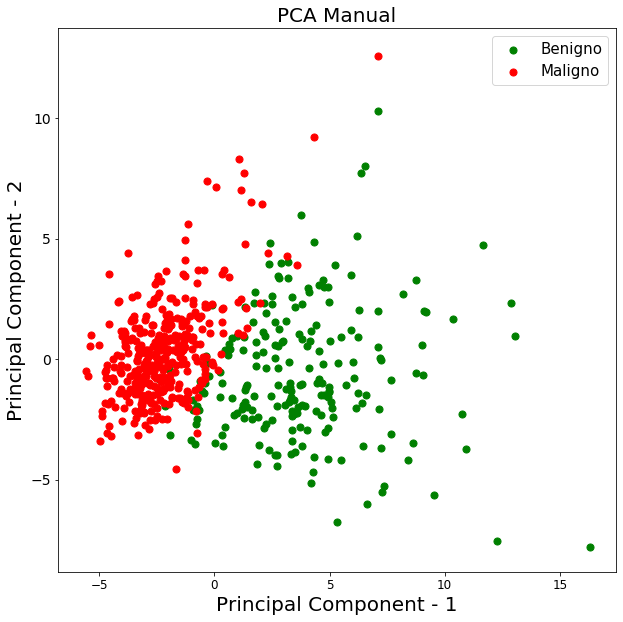

In [18]:
# Visualización
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("PCA Manual",fontsize=20)
targets = [0, 1]
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['target'] == target
    plt.scatter(pc_1[indicesToKeep], pc_2[indicesToKeep], c = color, s = 50)

plt.legend(['Benigno', 'Maligno'],prop={'size': 15})

<Figure size 432x288 with 0 Axes>

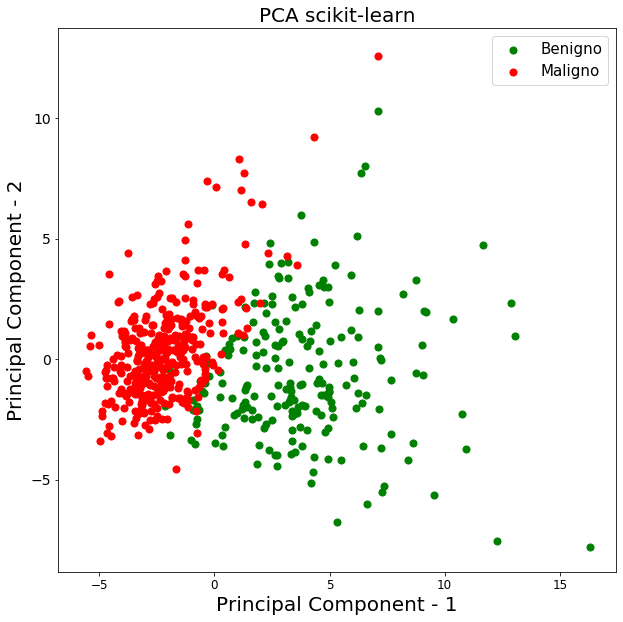

In [19]:
# Visualización
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("PCA scikit-learn",fontsize=20)
targets = [0, 1]
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['target'] == target
    plt.scatter(pc_manual_1[indicesToKeep], pc_manual_2[indicesToKeep], c = color, s = 50)

plt.legend(['Benigno', 'Maligno'],prop={'size': 15})